In [1]:
using Distributions
using Plots
using StatsBase
using Turing

# using Distributions
# using Plots
# using StatsBase

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1242


  Building Libtask → `/opt/julia/packages/Libtask/RjRkK/deps/build.log`


  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [2]:
success=6

tosses=9

# Create a distribution with n = 9 (e.g. tosses) and p = 0.5.

d = Binomial(tosses, 0.5)
pdf(d, success)

0.1640625000000001

In [3]:
# define grid
grid_points = 100
p_grid =  range(0, stop = 1, length = grid_points)

0.0:0.010101010101010102:1.0

In [4]:
# compute likelihood at each point in the grid
likelihood = [pdf(Binomial(tosses, p), success) for p in p_grid]

# define prior
prior = ones(length(p_grid));

# As Uniform prior has been used, unstandardized posterior is equal to likelihood

# compute product of likelihood and prior
posterior = likelihood .* prior;

In [5]:
function computePosterior(likelihood, prior)
   
    # compute product of likelihood and prior
    unstd_posterior = likelihood .* prior

    # standardize posterior
    posterior = unstd_posterior / sum(unstd_posterior)
    
    p1 = plot(p_grid, prior, title = "Prior")
    p2 = plot(p_grid, likelihood , title = "Likelihood")
    p3 = plot(p_grid, posterior, title = "Posterior")
    
    plot(p1, p2, p3, layout=(1, 3), label="")

end

computePosterior (generic function with 1 method)

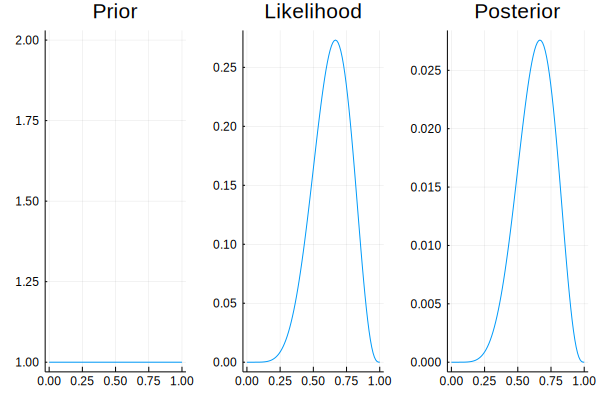

In [6]:
prior1 = ones(length(p_grid))
posterior1 = computePosterior(likelihood, prior1)

In [7]:
##############################################
# the Monte Carlo method - compute pi
##############################################

function in_circle(x, y, r)
    sqrt(x^2 + y^2) <= r
end

in_circle (generic function with 1 method)

In [8]:
function approx_pi(r, n)
    
    xs, ys, cols = [], [], []
    
    count = 0

    for i in range(1, step=1, stop=n)
        x = rand(Uniform(0,1))
        y = rand(Uniform(0,1))
        append!(xs, x)
        append!(ys, y)

        if in_circle(x, y, r)
            count += 1
            cols = vcat(cols, :red)
        else
            cols = vcat(cols, :steelblue)
        end
    end

    pi_appr = round(4 * count/n, digits = 3)
    
    pl = scatter(xs, 
        ys, 
        color=cols, 
        size=(200,200),
        legend = false,
        xticks = false,
        yticks = false,
        framestyle = :box,
        title = "pi (approximately) = " * string(pi_appr),
        titlefontsize=font(7, "Calibri"))
    
    display(pl)
    
end

approx_pi (generic function with 1 method)

In [10]:
5 * 10 .^[1, 2, 3]

3-element Array{Int64,1}:
   50
  500
 5000

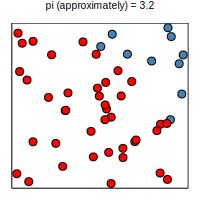

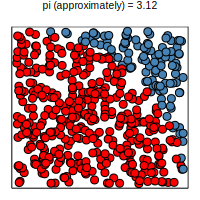

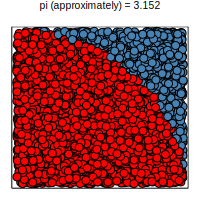

In [9]:

r = 1
n = 100

for n in 5 * 10 .^[1, 2, 3]
    approx_pi(r, n)
end

In [15]:
##############################################
# the Monte Carlo method - integration
##############################################

exp(1) - exp(0)

1.718281828459045

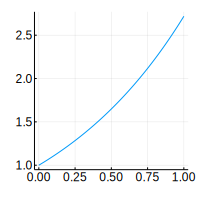

In [11]:
x = range(0, stop = 1, length = 100)
plot(x, exp.(x), size= [200,200], legend= false)

In [16]:
pts

100000000×2 Array{Float64,2}:
 0.762939   0.385519
 0.0142602  0.295918
 0.216848   1.37379 
 0.996778   1.03211 
 0.650455   1.76382 
 0.30779    2.66104 
 0.502228   1.69089 
 0.392323   1.26893 
 0.253489   0.530074
 0.558908   2.64626 
 0.631999   1.7776  
 0.92733    2.45449 
 0.337629   0.196855
 ⋮                  
 0.838594   2.41793 
 0.696703   1.21292 
 0.758119   1.17318 
 0.482081   2.23482 
 0.497831   0.347872
 0.976799   0.118715
 0.0658136  0.365203
 0.316837   2.66085 
 0.937269   1.0962  
 0.669773   1.18134 
 0.149957   1.50972 
 0.228915   0.72947 

In [12]:
pts =  rand(Uniform(0,1), (100, 2)) # sample uniformly in the square
pts[:, 2] *= exp(1)

cols = fill(:steelblue, 100)

for i in range(1, step=1, stop=100)
    if pts[i,2] > exp(pts[i,1])     # acceptance / rejection step
        cols[i] = :red
    end
end

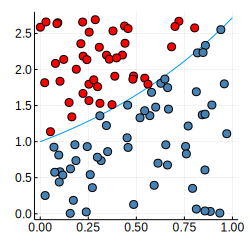

In [13]:
scatter!(pts[:, 1], pts[:, 2], color = cols, size=[250, 250], legend = false, xlim = [0,1], ylim = [0, exp(1)])


In [14]:
# Monte Carlo approximation

for n in 10 .^[1, 2, 3, 4, 5, 6, 7, 8]
    pts =  rand(Uniform(0,1), (n, 2))
    pts[:, 2] *= exp(1)
    count = sum(pts[:, 2] .< exp.(pts[:, 1]))
    volume = exp(1) * 1 # volume of region
    sol = (volume * count)/n    
    println(sol)
end

1.087312731383618
1.576603460506246
1.758728343013002
1.7217597101459592
1.7183618578603854
1.7165324541898324
1.7186043285994839
1.7181083780798816


In [17]:
##############################################
# coin tossing
##############################################

n = 4
h = 3
p = h/n

a, b = 10, 10                   # hyperparameters
prior = Beta(a, b)              # prior
post = Beta(h+a, n-h+b)         # posterior

Beta{Float64}(α=13.0, β=11.0)

In [18]:
function beta_binomial(n, h, a, b)
    # frequentist
    p = h/n
    mu = mean(Binomial(n, p))
    
    # Bayesian
    thetas = range(0, stop=1, length=200)
    prior = pdf.(Beta(a, b), thetas)

    post = pdf.(Beta(h+a, n-h+b), thetas)
    
    likelihood = n * [pdf(Binomial(n, p), h) for p in thetas];
    plot(thetas, 
         prior, 
         size= [400, 400], 
         label = "Prior",
         color = :blue,
         xlim = [0, 1],
         xlabel = "theta",
         ylabel = "Density")
    plot!(thetas, post, label = "Posterior", color = :red)
    plot!(thetas, likelihood, label="Likelihood", color = :green, legend = :topleft)
    vline!([(h+a-1)/(n+a+b-2)], color = :red, linestyle = :dash, label="MAP")
    vline!([mu / n], color = :green, linestyle = :dash, label="MLE")
 
end

beta_binomial (generic function with 1 method)

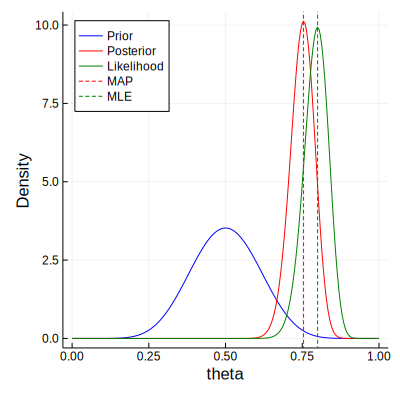

In [19]:
beta_binomial(100, 80, 10, 10)

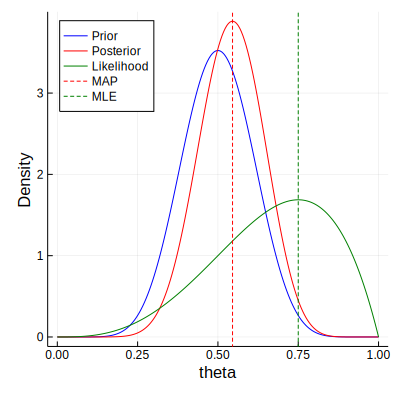

In [23]:
beta_binomial(4, 3, 10, 10)

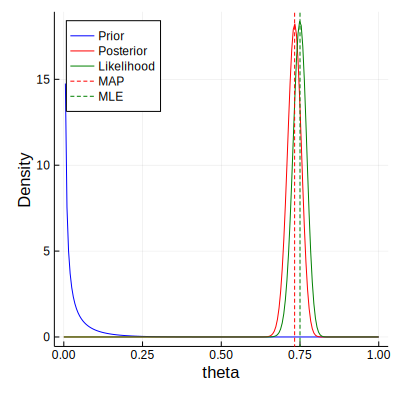

In [29]:
beta_binomial(400, 300, 0.1, 10)

In [30]:
##############################################
# Metropolis-Hastings
##############################################

function target(likelihood, prior, n, h, theta)
    if (theta < 0 ||  theta > 1)
        return 0
    else
        return (pdf(likelihood(n, theta), h) * pdf(prior, theta))
    end
end

target (generic function with 1 method)

In [31]:
n = 100
h = 61
a = 10
b = 10
likelihood = Binomial
prior = Beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
niters = 10000

samples = zeros(niters+1)
samples[1] = theta

0.1

In [32]:
for i=1:niters
    theta_p = theta + rand(Normal(0, sigma))
    rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = rand(Uniform(0,1))
    if u < rho
            naccept += 1
            theta = theta_p
    end
    samples[i+1] = theta
end

In [33]:
println("Portion of accepted steps = " * string(naccept/niters))

Portion of accepted steps = 0.1895


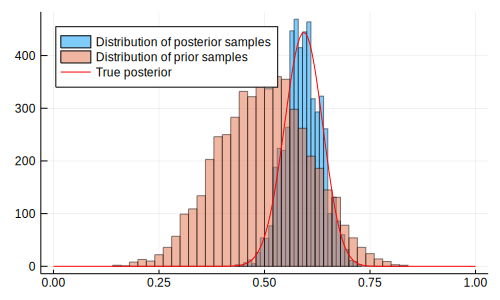

In [35]:
nmcmc = Int(round(length(samples)/2))

post = Beta(h+a, n-h+b)
thetas = range(0, stop=1, length=200)

histogram(samples[nmcmc:length(samples)] ,
          size = [500, 300],
    
          label="Distribution of posterior samples", alpha = 0.5,
          legend = :topleft)
histogram!(rand(prior, nmcmc), 
          label = "Distribution of prior samples", alpha = 0.5)
plot!(thetas, 50*[pdf(post, theta) for theta in thetas], color = :red, label = "True posterior")

In [36]:
function mh_coin(niters, n, h, theta, likelihood, prior, sigma)
    
    samples = [theta]
    while length(samples) < niters
        theta_p = theta + rand(Normal(0, sigma))
        rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
        u = rand(Uniform(0,1))
        if u < rho
            theta = theta_p
        end
        append!(samples, theta)
    end
    
    return samples

end

mh_coin (generic function with 1 method)

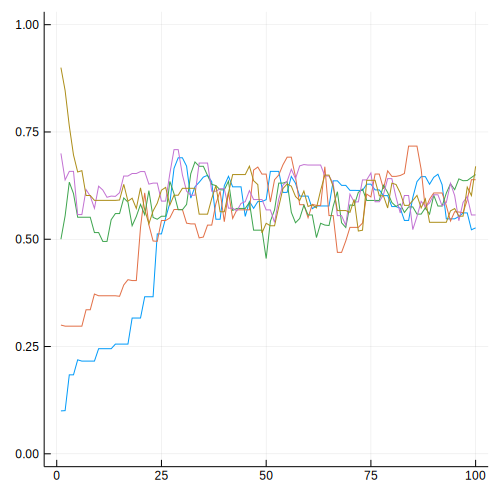

In [39]:

n = 100
h = 61
lik = Binomial
prior = Beta(a, b)
sigma = 0.05
niters = 100

chains = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in range(0.1, stop=1, step=0.2)];

p = plot(chains[1], size= [500, 500], legend =:false, xlim = [0, niters], ylim = [0, 1])
for i in 2:length(chains)
    plot!(chains[i])
end
display(p)

In [40]:
##############################################
# Turing
##############################################

using Turing

In [42]:
# @model mod(y) = begin
#     # model definition
# end

n = 100    # number of trials
h = 61     # number of successes

niter = 10000

@model coin(n, h) = begin
    
    # prior
    p ~ Beta(2, 2)
    
    # likelihood
    h ~ Binomial(n, p)
    
end

In [43]:
ch = sample(coin(n,h), NUTS(niter, 0.65));

show(ch)

┌ Info: Found initial step size
│   init_ϵ = 0.8
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.4376174840209415), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.44)
│   h.metric = DiagEuclideanMetric([0.036635943075329434])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 10000 sampling steps in 0.367183328 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.036635943075329434]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.44), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 12692.569951869818
│   average_acceptance_rate = 0.8148610284934616
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


Object of type Chains, with data of type 9000×11×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:9000
Thinning interval = 1
Chains            = 1
Samples per chain = 9000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = p

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean    │ std       │ naive_se    │ mcse        │ ess     │ r_hat    │
│     │ Symbol     │ Float64 │ Float64   │ Float64     │ Float64     │ Any     │ Any      │
├─────┼────────────┼─────────┼───────────┼─────────────┼─────────────┼─────────┼──────────┤
│ 1   │ p          │ 0.60719 │ 0.0474973 │ 0.000500666 │ 0.000855825 │ 3382.07 │ 0.999957 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%   │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64 │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼──────────┼─────────┼───

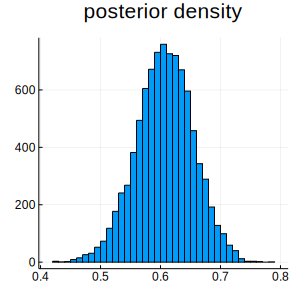

In [46]:
# read samples into array
p = convert(Array{Float64}, ch[:p].value.data[:,:,1][:,1]);

histogram(p, size = [300, 300], legend = false, title = "posterior density")

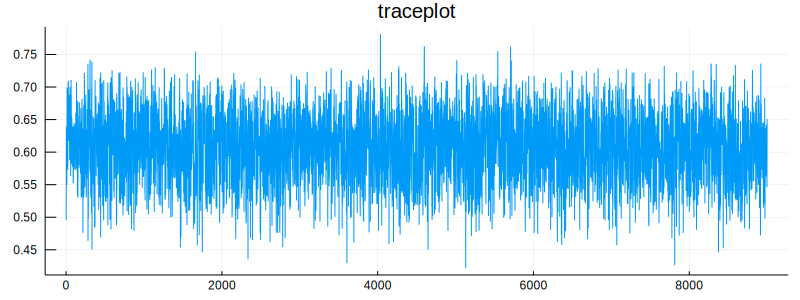

In [50]:
# traceplot 
plot(p, size = [800, 300], legend = false, title = "traceplot")

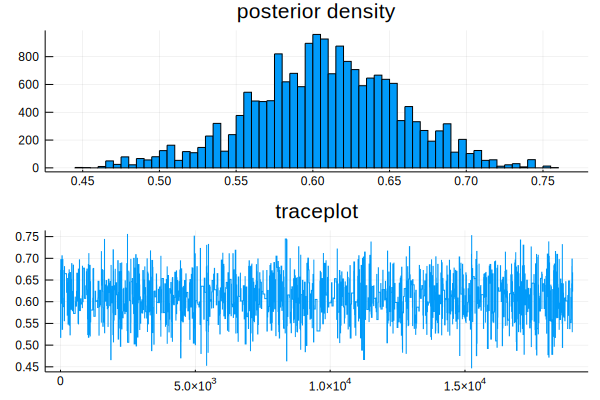

In [63]:
function plot_par(par)
    p1 = histogram(par, size = [400, 400], legend = false, title = "posterior density")
    p2 = plot(par, title = "traceplot")
    plot(p1, p2, layout=(2, 1), label="")
end

plot_par(p)

In [56]:
##############################################
# hierarchical models
##############################################

@model coin_hier(n, h) = begin
    
    # hyperparameters    
    alpha_hyp ~ InverseGamma(10, 2)
    beta_hyp ~ InverseGamma(10, 2)
    
    # prior
    p ~ Beta(alpha_hyp, beta_hyp)
    
    # likelihood
    h ~ Binomial(n, p)
    
end

coin_hier (generic function with 3 methods)

In [57]:
niter = 20000

ch = sample(coin_hier(n,h), NUTS(niter, 0.30));

show(ch)

┌ Info: Found initial step size
│   init_ϵ = 0.8
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.3, state.ϵ=2.3469518383708707), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=2.35)
│   h.metric = DiagEuclideanMetric([0.12607245226671665, 0.082 ...])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 1.437550435 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.12607245226671665, 0.082 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=2.35), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 17702.93573020593
│   average_acceptance_rate = 0.06713818141081736
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


Object of type Chains, with data of type 19000×13×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:19000
Thinning interval = 1
Chains            = 1
Samples per chain = 19000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = alpha_hyp, beta_hyp, p

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean     │ std       │ naive_se    │ mcse       │ ess     │ r_hat   │
│     │ Symbol     │ Float64  │ Float64   │ Float64     │ Float64    │ Any     │ Any     │
├─────┼────────────┼──────────┼───────────┼─────────────┼────────────┼─────────┼─────────┤
│ 1   │ alpha_hyp  │ 0.234818 │ 0.0833921 │ 0.00060499  │ 0.00259525 │ 1190.31 │ 1.00155 │
│ 2   │ beta_hyp   │ 0.231121 │ 0.087201  │ 0.000632622 │ 0.00243663 │ 1243.38 │ 1.00271 │
│ 3   │ p          │ 0.608    │ 0.0485988 │ 0.000352573 │ 0.00137023 │ 1212.76 │ 1.00057 │

Qua

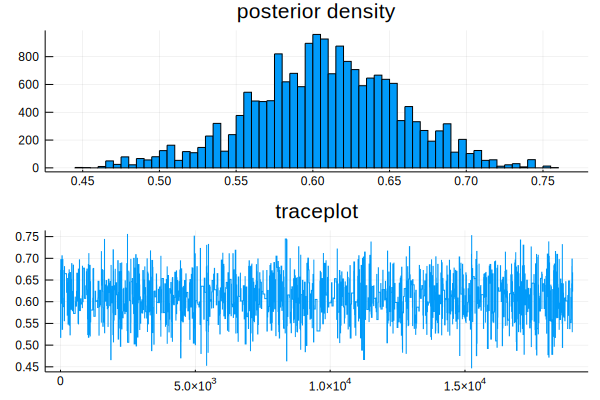

In [58]:
# read samples into array
p = convert(Array{Float64}, ch[:p].value.data[:,:,1][:,1]);
plot_par(p)

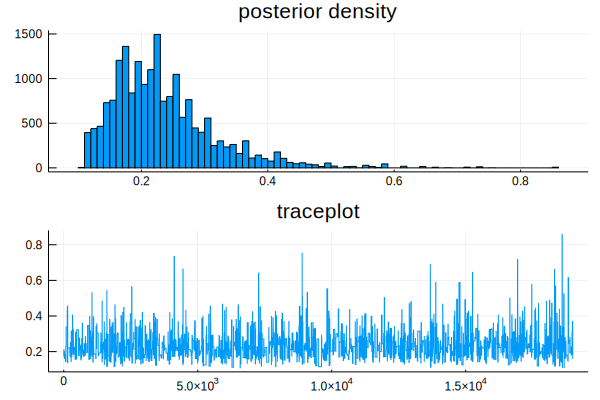

In [64]:
alpha_hyp = convert(Array{Float64}, ch[:alpha_hyp].value.data[:,:,1][:,1]);
plot_par(alpha_hyp)

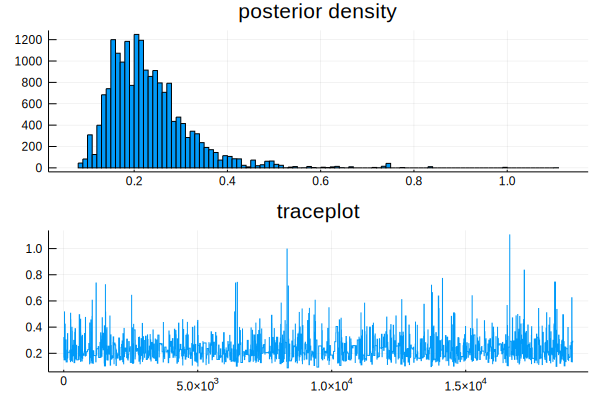

In [65]:
beta_hyp = convert(Array{Float64}, ch[:beta_hyp].value.data[:,:,1][:,1]);
plot_par(beta_hyp)

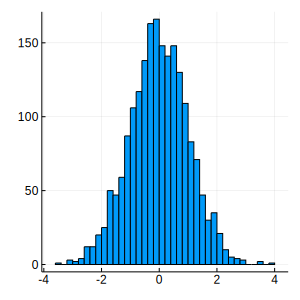

In [67]:
##############################################
# normal distribution
##############################################

N = 2000
y = rand(Normal(0,1), N)
histogram(y, size = [300, 300], legend = false)

┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.364219569395138), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.36)
│   h.metric = DiagEuclideanMetric([0.0003926130711982538])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 6.568200075 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.0003926130711982538]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.36), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 14664.293608635026
│   average_acceptance_rate = 0.866717180193591
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


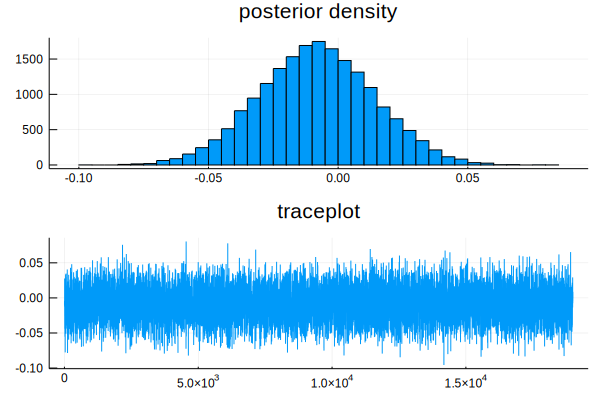

In [68]:
@model norm_mu(y) = begin
    
    sigma = 1
    
    # prior
    mu ~ Normal(0,0.5)
    
    # likelihood    
    for i in eachindex(y)
        y[i] ~  Normal(mu, sigma)
   end
    
end

ch = sample(norm_mu(y), NUTS(niter, 0.65));

mu = ch[:mu].value.data[:,:,1]

plot_par(mu)

In [69]:
num_chains = 4
chains = mapreduce(c -> sample(norm_mu(y), NUTS(niter, 0.65)), chainscat, 1:num_chains)

┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.29323747077879), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.29)
│   h.metric = DiagEuclideanMetric([0.0004101004795818693])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 6.572303375 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.0004101004795818693]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.29), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 23650.05099728745
│   average_acceptance_rate = 0.8749949257178501
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157
┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turi

Object of type Chains, with data of type 19000×11×4 Array{Union{Missing, Float64},3}

Iterations        = 1:19000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 19000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = mu

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean        │ std       │ naive_se   │ mcse        │
│     │ Symbol     │ Float64     │ Float64   │ Float64    │ Float64     │
├─────┼────────────┼─────────────┼───────────┼────────────┼─────────────┤
│ 1   │ mu         │ -0.00893058 │ 0.0223366 │ 8.10235e-5 │ 0.000125772 │

Quantiles
. Omitted printing of 1 columns
│ Row │ parameters │ 2.5%       │ 25.0%      │ 50.0%       │ 75.0%      │
│     │ Symbol     │ Float64    │ Float64    │ Float64     │ Float64    │
├─────┼────────────┼────────────┼────────────┼─────────────┼───────

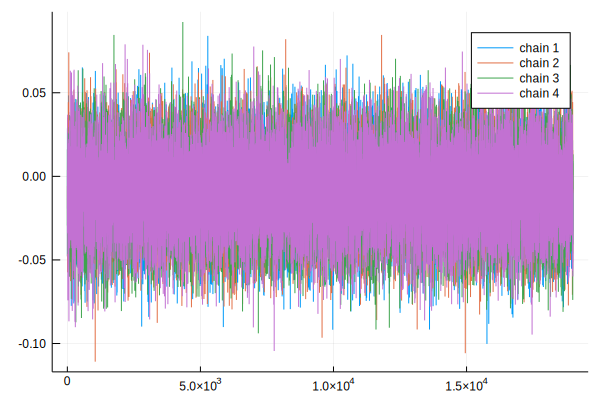

In [70]:
mu = chains[:mu].value.data
plot(mu[:,:,1], label ="chain 1")
plot!(mu[:,:,2], label ="chain 2")
plot!(mu[:,:,3], label ="chain 3")
plot!(mu[:,:,4], label ="chain 4")

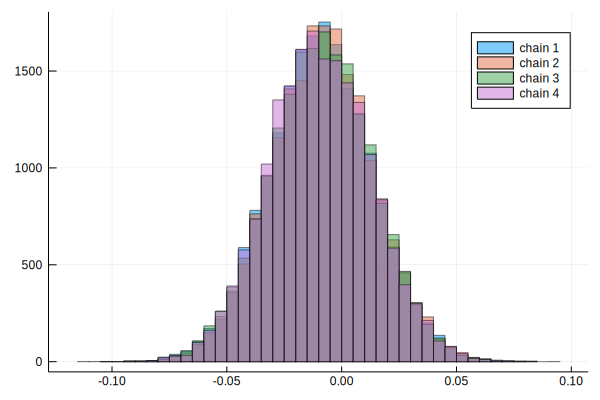

In [71]:
histogram(mu[:,:,1], alpha = 0.5, label = "chain 1")
histogram!(mu[:,:,2], alpha = 0.5, label = "chain 2")
histogram!(mu[:,:,3], alpha = 0.5, label = "chain 3")
histogram!(mu[:,:,4], alpha = 0.5, label = "chain 4")

In [72]:
## Now we assume that we don't know what sigma is and we will try to infer that from the data
@model norm_mu_sigma(y) = begin
        
    # priors
    mu ~ Normal(0,0.5)
    sigma ~ InverseGamma(2, 3)
    
    # likelihood    
    for i in eachindex(y)
        y[i] ~  Normal(mu, sigma)
   end
    
end

ch = sample(norm_mu_sigma(y), NUTS(niter, 0.65));

show(ch)

┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.198428404697128), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.2)
│   h.metric = DiagEuclideanMetric([0.0005212773167445066, 0.0 ...])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 10.346844844 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.0005212773167445066, 0.0 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.2), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 22000.42928062697
│   average_acceptance_rate = 0.8098267614014314
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


Object of type Chains, with data of type 19000×12×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:19000
Thinning interval = 1
Chains            = 1
Samples per chain = 19000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = mu, sigma

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean        │ std       │ naive_se    │ mcse        │ ess     │ r_hat    │
│     │ Symbol     │ Float64     │ Float64   │ Float64     │ Float64     │ Any     │ Any      │
├─────┼────────────┼─────────────┼───────────┼─────────────┼─────────────┼─────────┼──────────┤
│ 1   │ mu         │ -0.00855238 │ 0.0225314 │ 0.00016346  │ 0.000151386 │ 19904.5 │ 0.999954 │
│ 2   │ sigma      │ 1.01517     │ 0.016085  │ 0.000116693 │ 0.000111481 │ 19595.4 │ 0.999962 │

Quantiles

│ Row │ parameters │ 2.5%       │ 25.0%     │ 50.0%       │ 75.0%      

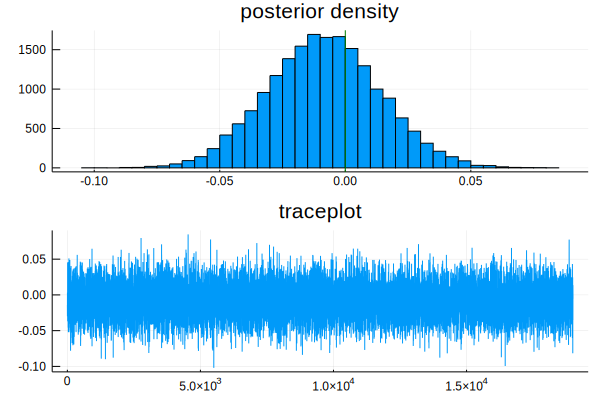

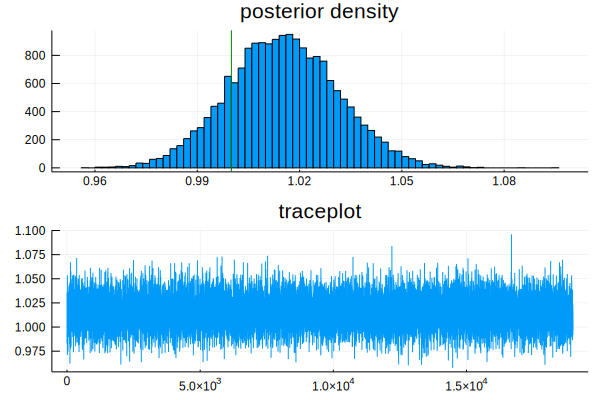

In [73]:
mu = ch[:mu].value.data[:,:,1]
sigma = ch[:sigma].value.data[:,:,1]
pl_mu = plot_par(mu)
vline!([0], color = :green, label="MLE")
pl_sigma = plot_par(sigma)
vline!([1], color = :green, label="MLE")
display(pl_mu)
display(pl_sigma)

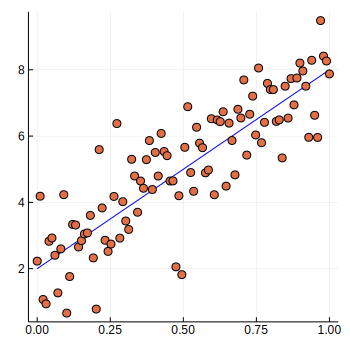

In [74]:
##############################################
# linear regression
##############################################

#data generation
n = 100
a_true = 6
b_true = 2
x = range(0, stop=1, length = n)
x = convert(Array, x)
y = a_true*x .+ b_true + rand(Normal(0,1), n);

plot(x, a_true*x .+ b_true, legend = false, size = [350, 350], color = :blue)
scatter!(x, y)


In [75]:
@model lin_reg(x, y) = begin
  
  a ~ Normal(0, 10)
  b ~ Normal(0, 10)
  lp = a * x .+ b
    
  s ~ InverseGamma(2, 3)
    
  for i in eachindex(y)
    y[i] ~ Normal(lp[i], sqrt(s))
  end
end

niter = 20000

ch = sample(lin_reg(x, y), NUTS(niter, 0.65));

┌ Info: Found initial step size
│   init_ϵ = 0.2
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.5698185614298653), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.57)
│   h.metric = DiagEuclideanMetric([0.09746410502022315, 0.034 ...])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 6.139141652 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.09746410502022315, 0.034 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.57), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 6658.720158616656
│   average_acceptance_rate = 0.8400999493809648
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


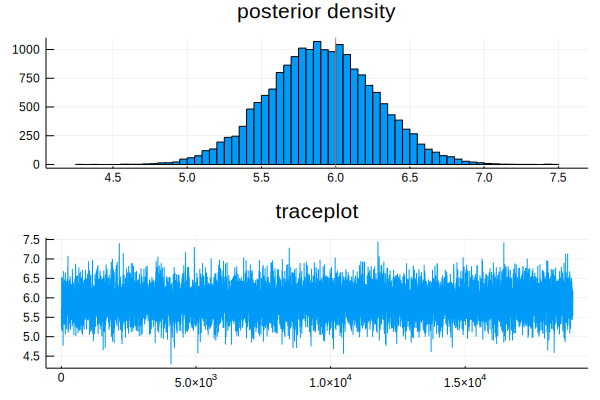

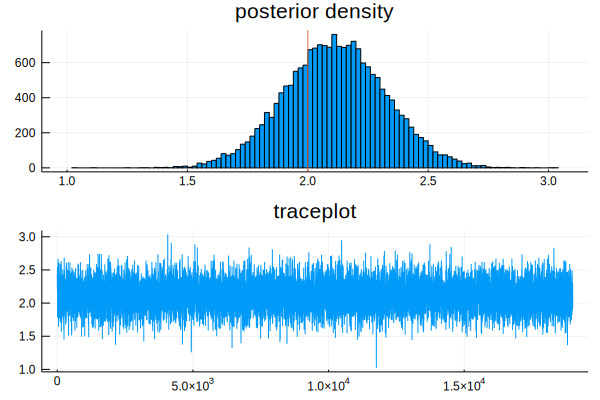

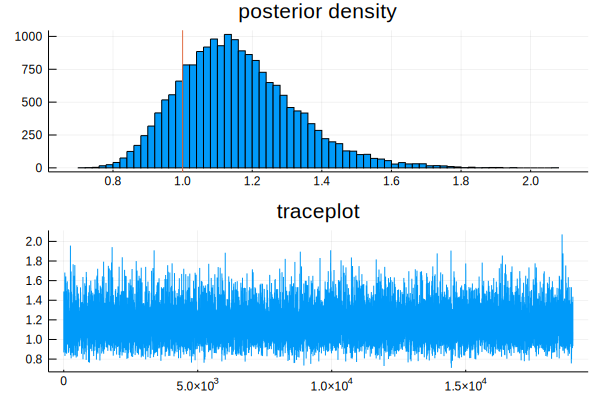

In [76]:
a = ch[:a].value.data[:,:,1]
b = ch[:b].value.data[:,:,1]
s = ch[:s].value.data[:,:,1]
pl_a = plot_par(a)
vline!([a_true])
pl_b = plot_par(b)
vline!([b_true])
pl_s = plot_par(s)
vline!([1])
display(pl_a); 
display(pl_b)
display(pl_s)

┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.160647823380894), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.16)
│   h.metric = DiagEuclideanMetric([0.0004066621741098188, 0.0 ...])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 46.967212486 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.0004066621741098188, 0.0 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.16), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 13386.012832903827
│   average_acceptance_rate = 0.8363239739655113
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


Object of type Chains, with data of type 19000×12×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:19000
Thinning interval = 1
Chains            = 1
Samples per chain = 19000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = alpha, beta

2-element Array{ChainDataFrame,1}

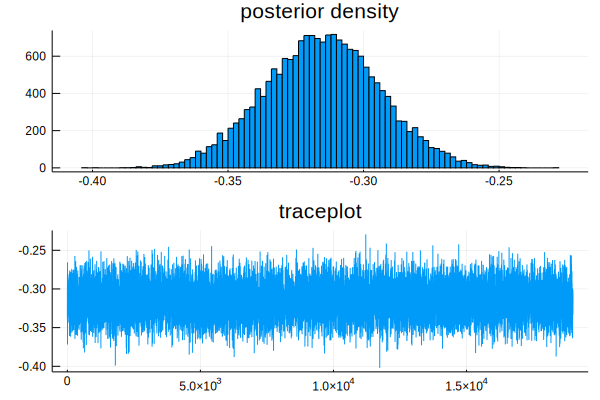

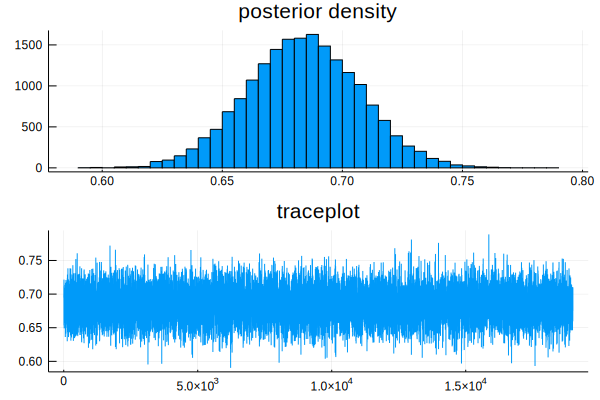



Summary Statistics

│ Row │ parameters │ mean      │ std       │ naive_se    │ mcse        │ ess     │ r_hat    │
│     │ Symbol     │ Float64   │ Float64   │ Float64     │ Float64     │ Any     │ Any      │
├─────┼────────────┼───────────┼───────────┼─────────────┼─────────────┼─────────┼──────────┤
│ 1   │ alpha      │ -0.315221 │ 0.0211537 │ 0.000153465 │ 0.000162776 │ 20977.0 │ 1.0002   │
│ 2   │ beta       │ 0.683719  │ 0.023529  │ 0.000170697 │ 0.000151919 │ 21582.0 │ 0.999962 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%     │ 50.0%     │ 75.0%     │ 97.5%     │
│     │ Symbol     │ Float64  │ Float64   │ Float64   │ Float64   │ Float64   │
├─────┼────────────┼──────────┼───────────┼───────────┼───────────┼───────────┤
│ 1   │ alpha      │ -0.35649 │ -0.329644 │ -0.315082 │ -0.300927 │ -0.273208 │
│ 2   │ beta       │ 0.63754  │ 0.667821  │ 0.683709  │ 0.69964   │ 0.730149  │
    Status `/opt/julia/environments/v1.2/Project.toml`
  [31c24e10] Distributions v0.21.1
  [f67

In [77]:
##############################################
# binomial likelihood
##############################################

function invlogit(x)
  exp.(x) ./ (1 .+  exp.(x))
end

n = 1000
x = rand(Normal(), n)
alpha_true = -0.3
beta_true = 0.7
ps = alpha_true .+ beta_true*x 
ps = invlogit(ps)
y = [rand(Binomial(10, p)) for p in ps];
histogram(ps, bins = 20, title = "p", label = "", size = [300, 300])

@model binom(x, y) = begin
  
  alpha ~ Normal(0, 1)
  beta ~ Normal(0, 1)
  
  p = invlogit(alpha .+ beta*x)

  for i in eachindex(y)
    y[i] ~ Binomial(10, p[i])
  end
end

ch = sample(binom(x, y), NUTS(niter, 0.65));

show(ch)

alpha = ch[:alpha].value.data[:,:,1]
beta = ch[:beta].value.data[:,:,1]
pl_a = plot_par(alpha)
pl_b = plot_par(beta)
display(pl_a); 
display(pl_b); 

using Pkg
Pkg.status()